# Phase 0: Introduction

**In this assignment, you will develop K-means and PCA algorithm to perform data segmentation. The dataset contains behavioral variables of customers such as Balance, Purchases, etc. Your task is to make a model to segment the same customers into the clusters.**

In [2]:
# essential packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

# add any other packages that you may need here

# Phase 1: Explore

## Sec 1: Load and Explore the given dataset 

Load the dataset and display the first 10 rows of dataset. 

In [3]:
df = pd.read_csv(r"D:\Sharif University of Tech\AI Boot Camp\HW4\FE\Data\Customer Data.csv")
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


Print the column names and number of data samples. 

In [4]:
print(f"column names: {df.columns}")
print(f"number of data samples: {len(df)}")

column names: Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')
number of data samples: 8950


Identify the columns that contain nan values. 

In [5]:
print(f"columns with nan values: {df.columns[df.isnull().any()].tolist()}")

columns with nan values: ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']


Fill the nan values with the median of each column. *

In [8]:
df = df.fillna(df['CREDIT_LIMIT'].median())

In [9]:
df = df.fillna(df['MINIMUM_PAYMENTS'].median())

Find the max, min, and average of each column with numerical data. 

In [11]:
import pandas as pd

df_stats = pd.DataFrame(columns=['column_name', 'min', 'max', 'mean'])

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        new_row = pd.DataFrame({'column_name': [column], 'min': [df[column].min()], 'max': [df[column].max()], 'mean': [df[column].mean()]})
        df_stats = pd.concat([df_stats, new_row], ignore_index=True)

print(df_stats)

                         column_name        min          max         mean
0                            BALANCE   0.000000  19043.13856  1564.474828
1                  BALANCE_FREQUENCY   0.000000      1.00000     0.877271
2                          PURCHASES   0.000000  49039.57000  1003.204834
3                   ONEOFF_PURCHASES   0.000000  40761.25000   592.437371
4             INSTALLMENTS_PURCHASES   0.000000  22500.00000   411.067645
5                       CASH_ADVANCE   0.000000  47137.21176   978.871112
6                PURCHASES_FREQUENCY   0.000000      1.00000     0.490351
7         ONEOFF_PURCHASES_FREQUENCY   0.000000      1.00000     0.202458
8   PURCHASES_INSTALLMENTS_FREQUENCY   0.000000      1.00000     0.364437
9             CASH_ADVANCE_FREQUENCY   0.000000      1.50000     0.135144
10                  CASH_ADVANCE_TRX   0.000000    123.00000     3.248827
11                     PURCHASES_TRX   0.000000    358.00000    14.709832
12                      CREDIT_LIMIT  

Plot the Histogram of each column with numerical data. Also, show the median and average value of each column in plot. 

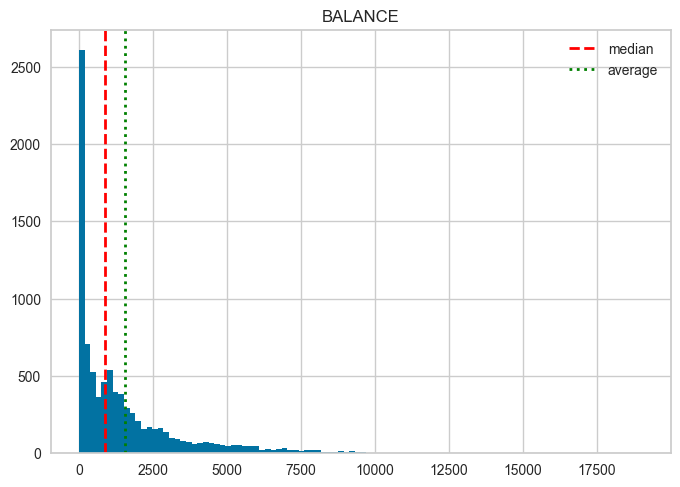

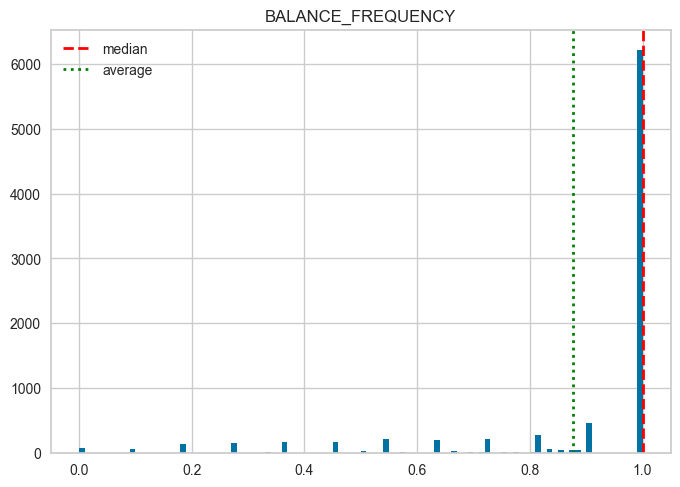

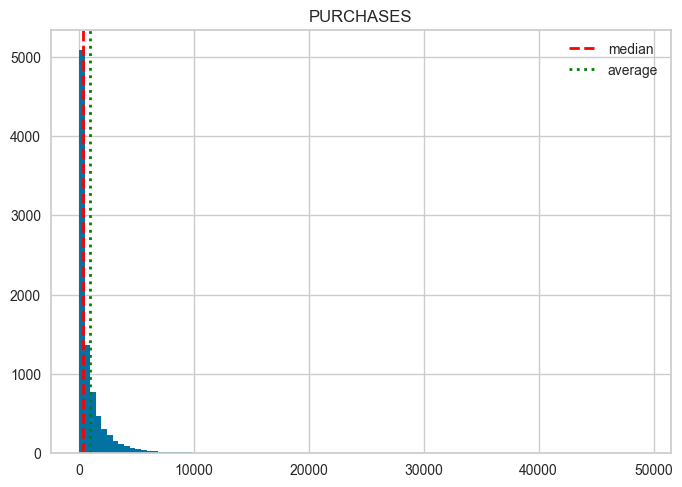

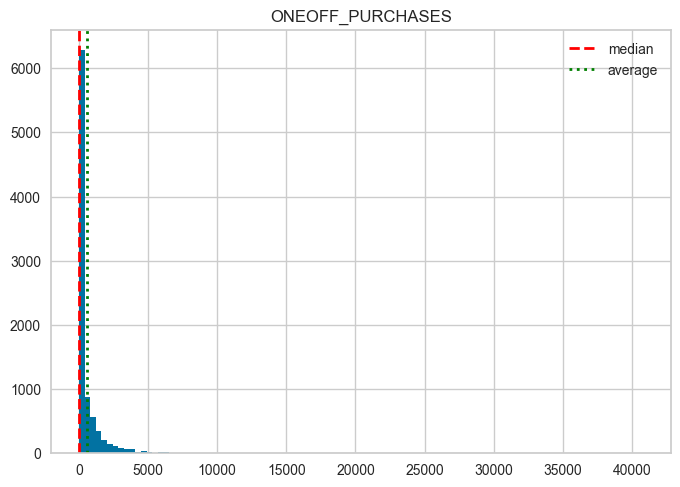

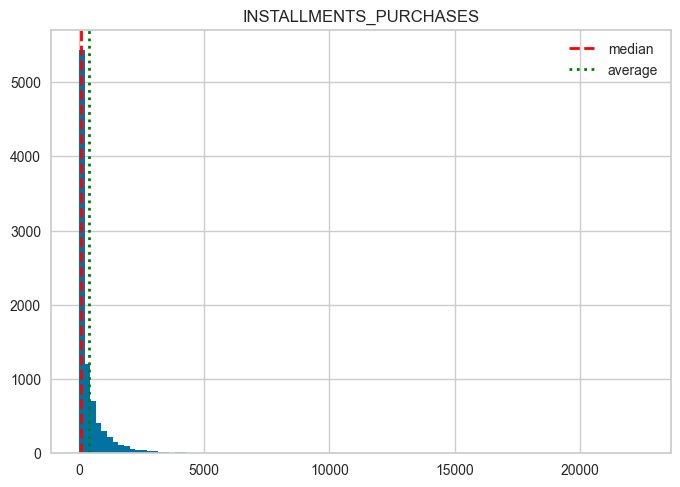

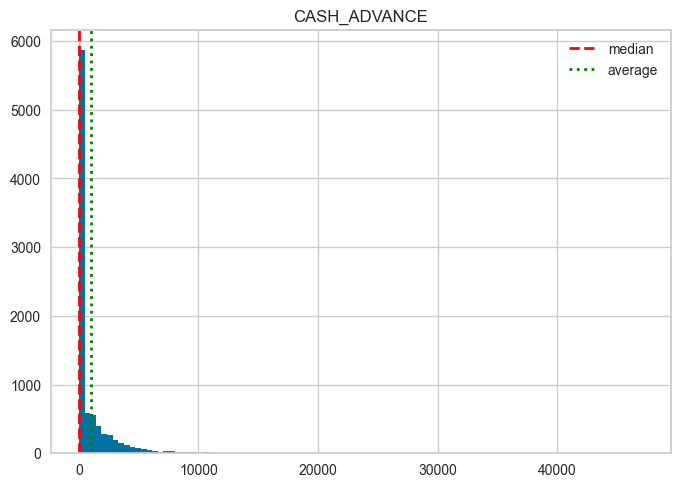

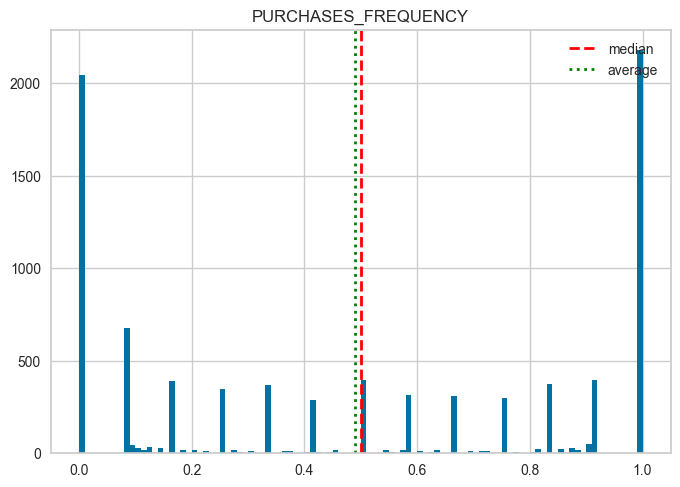

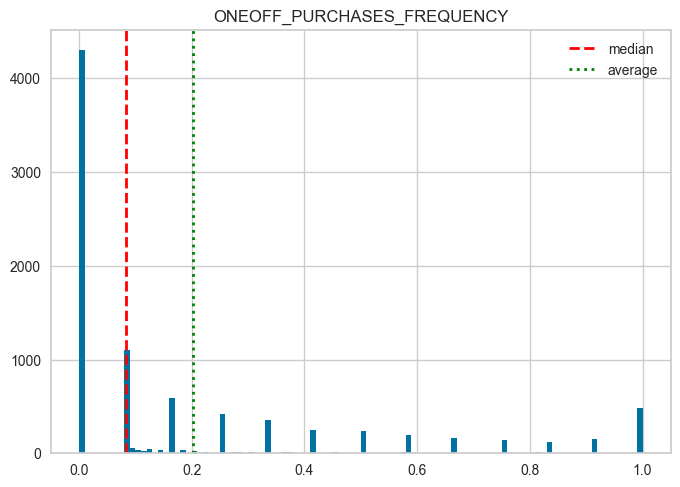

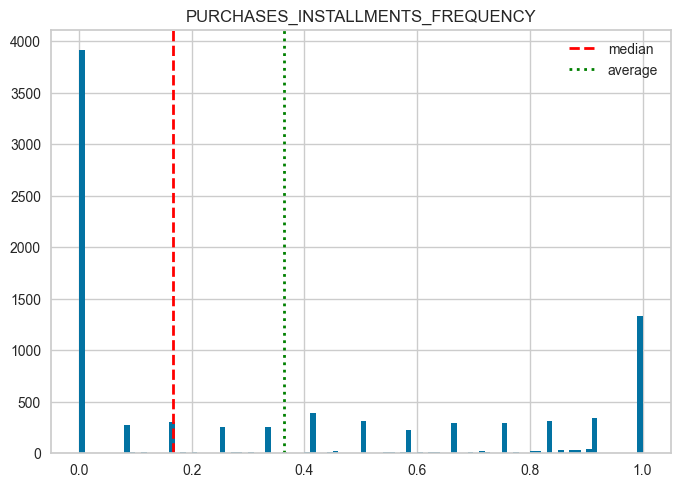

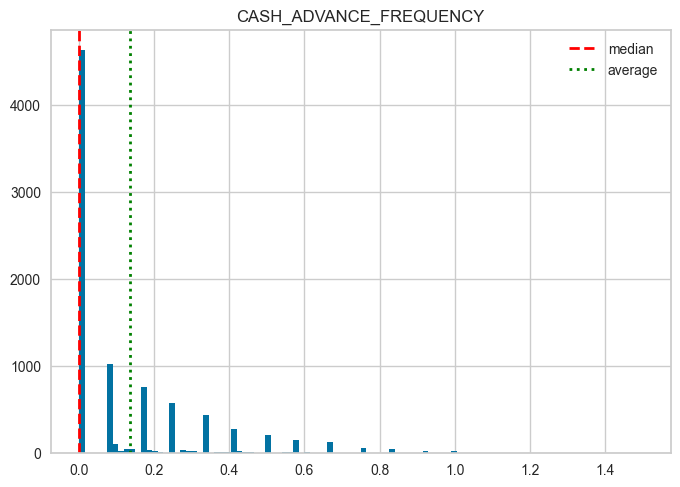

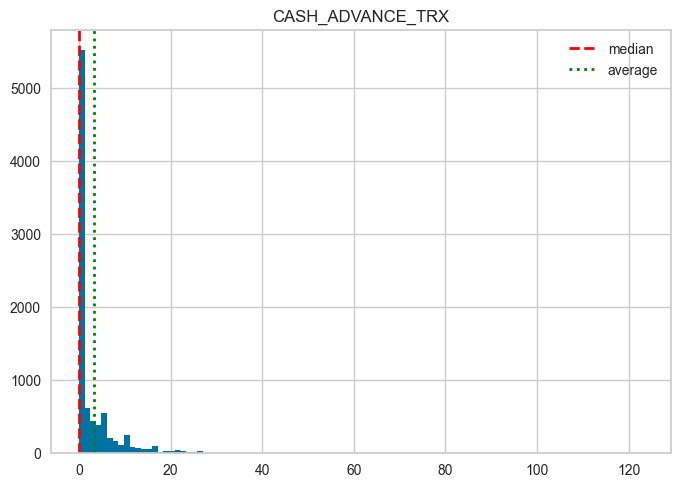

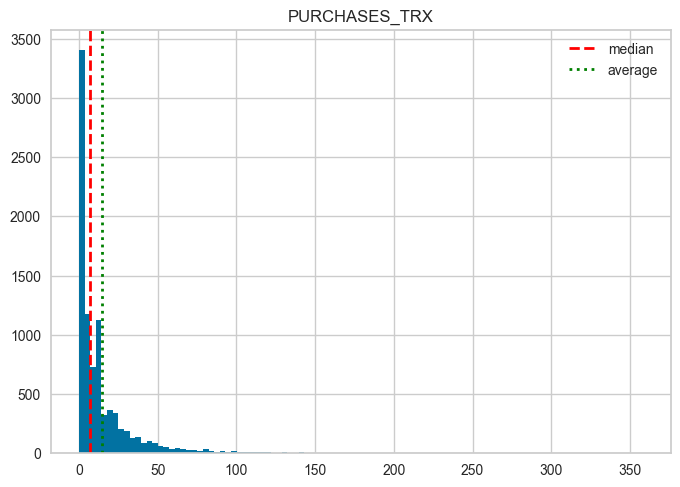

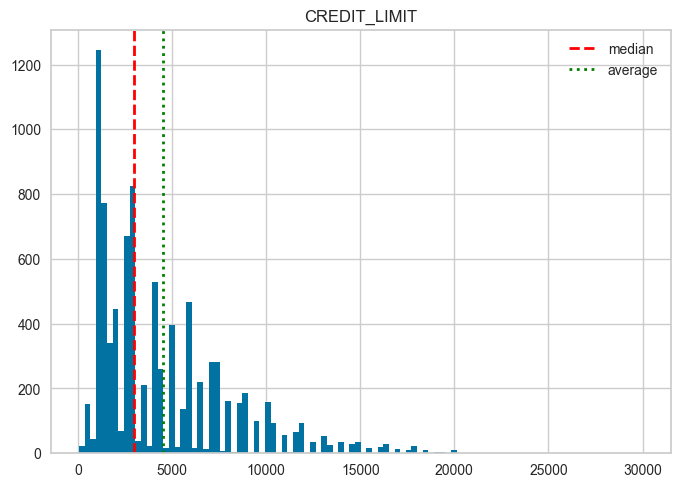

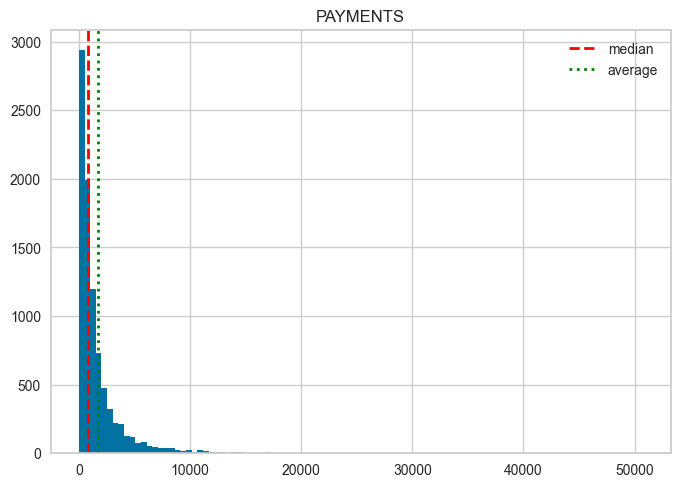

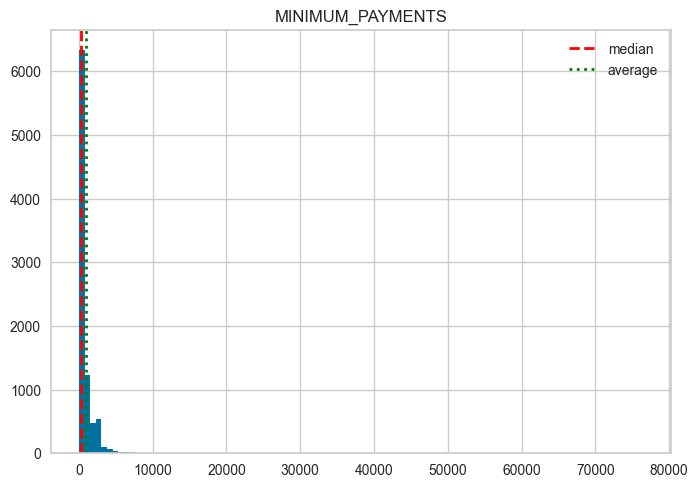

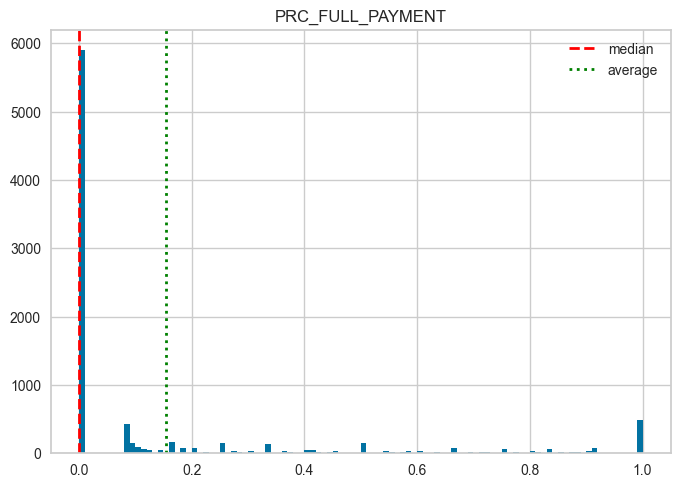

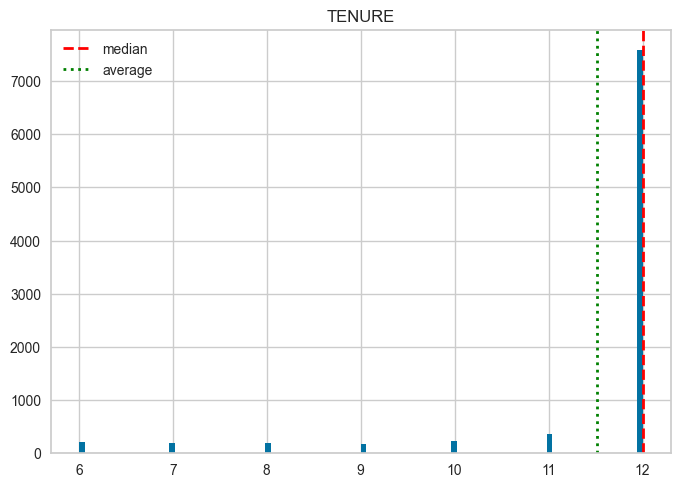

In [12]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        plt.figure()
        plt.hist(df[column], bins=100)
        plt.axvline(df[column].median(), color='red', linestyle='dashed', linewidth=2, label='median')
        plt.axvline(df[column].mean(), color='green', linestyle='dotted', linewidth=2, label='average')
        plt.legend()
        plt.title(column)
        plt.show()

Display the box plot for each numerical column. 

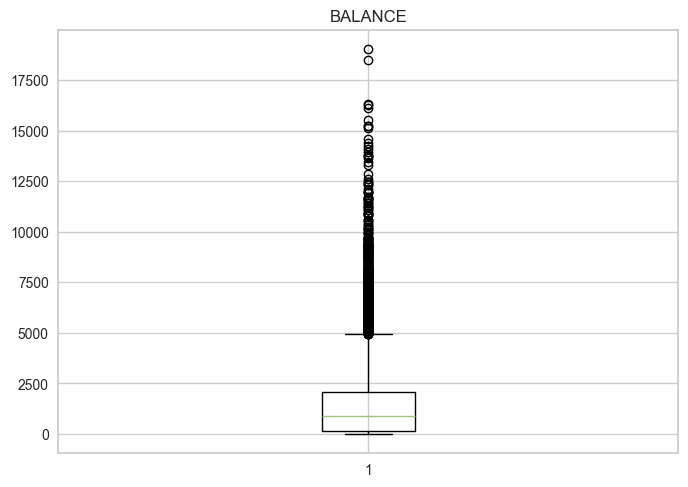

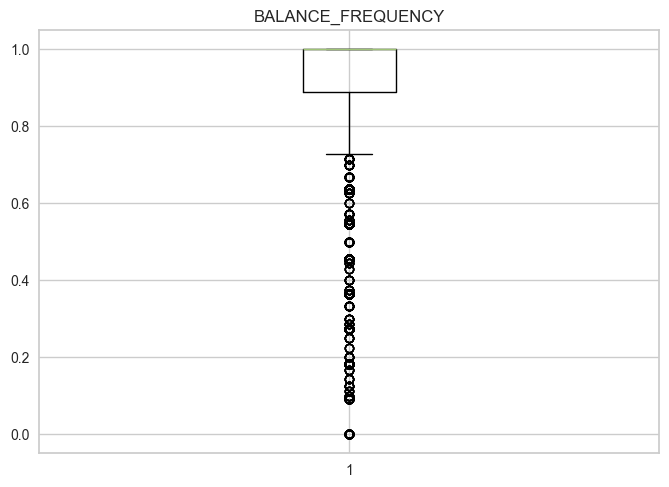

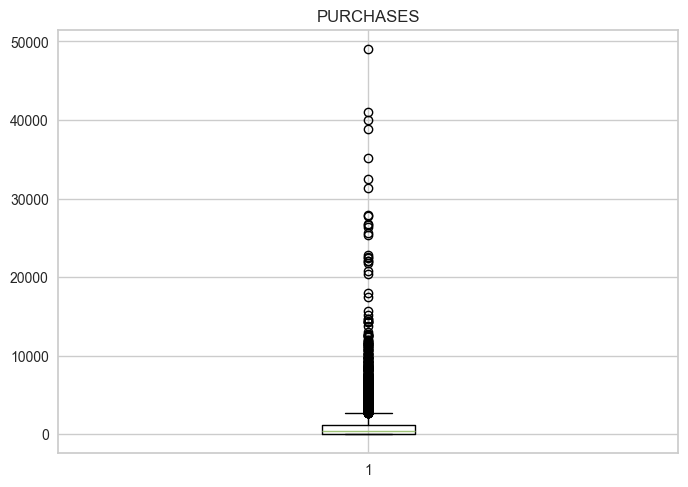

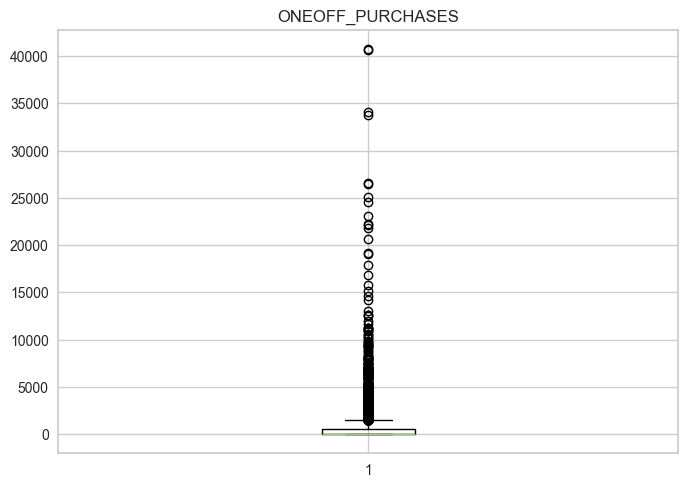

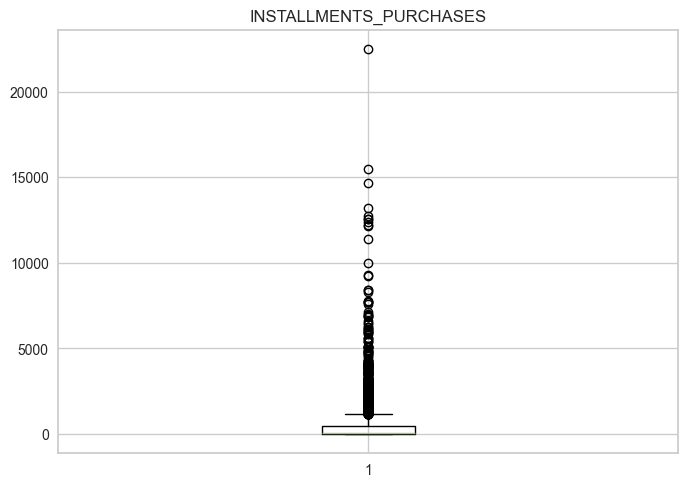

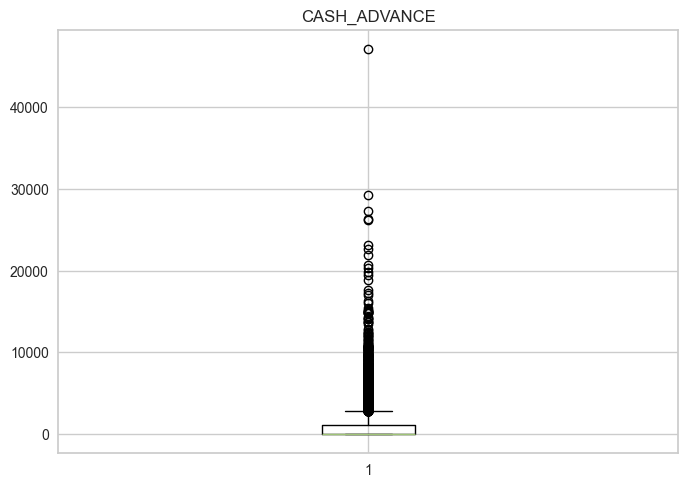

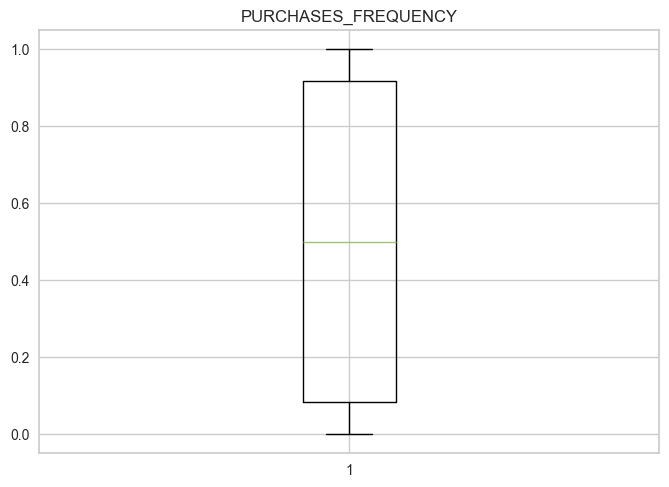

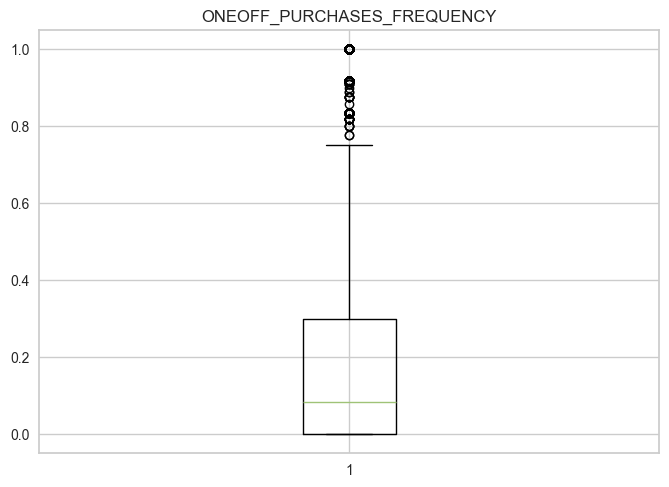

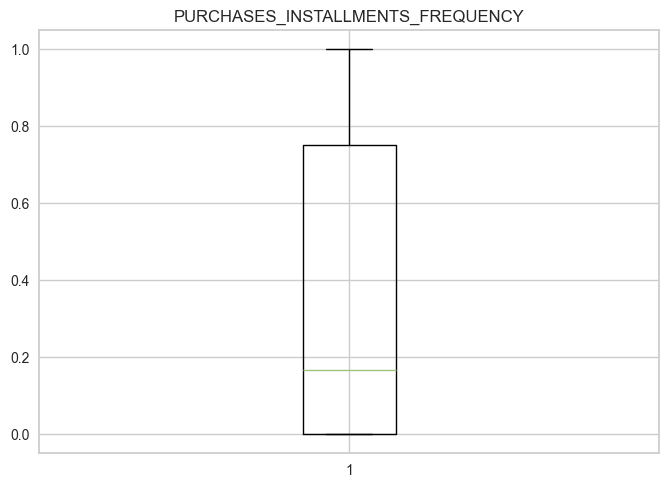

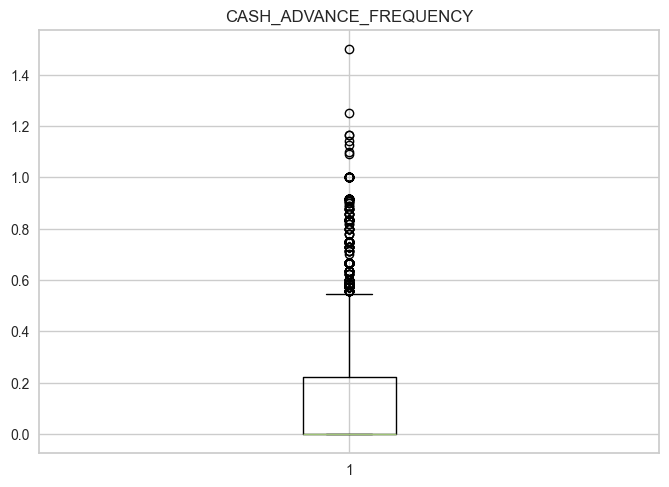

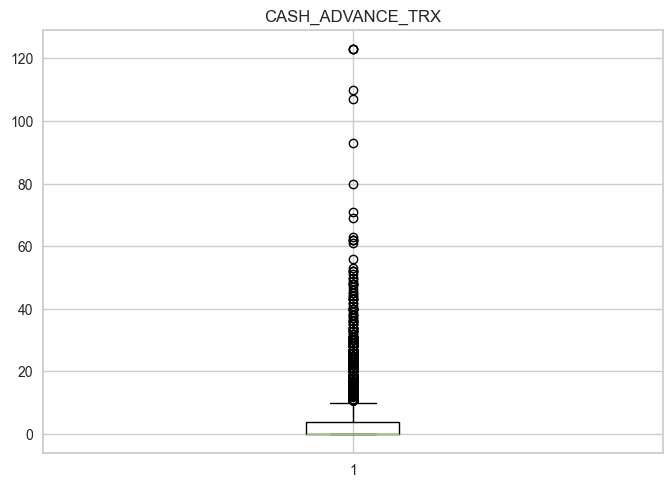

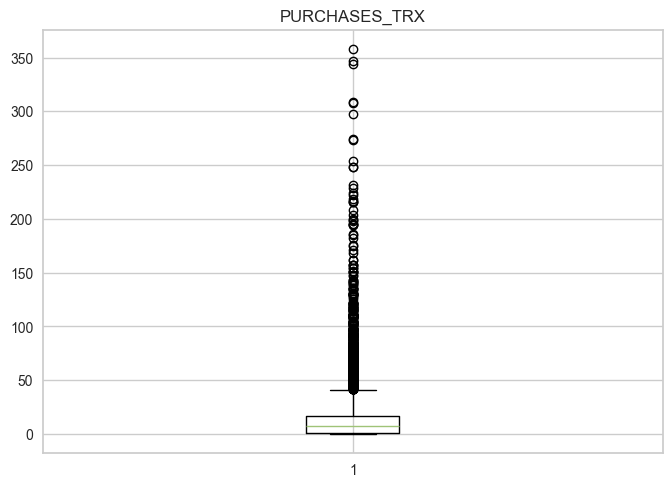

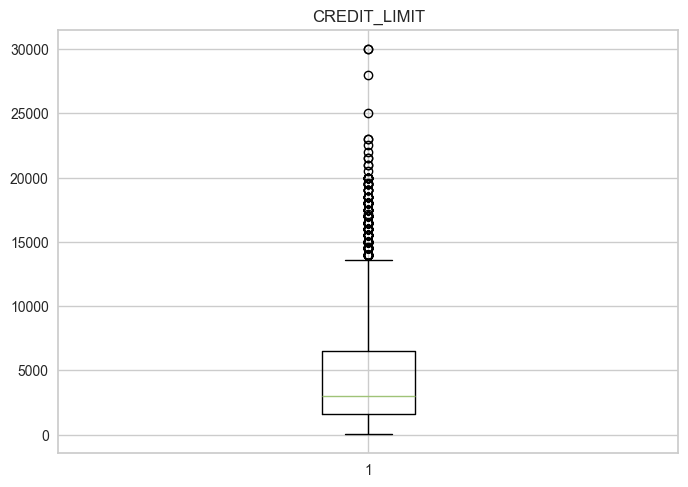

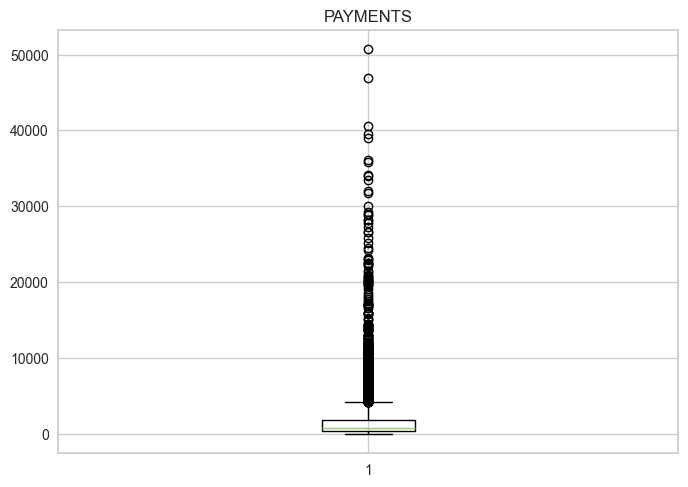

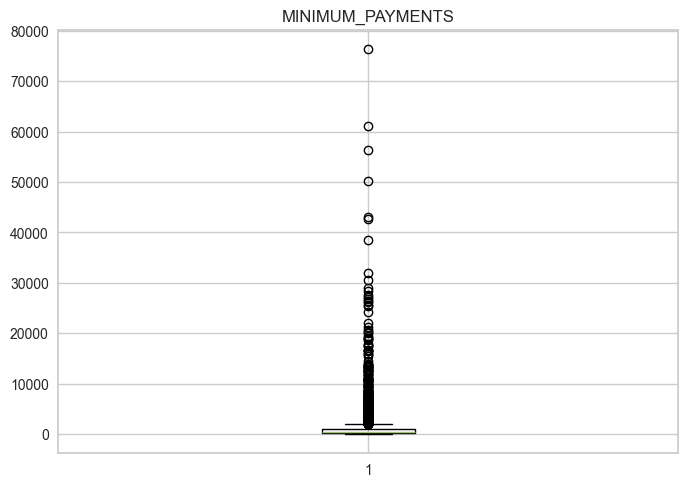

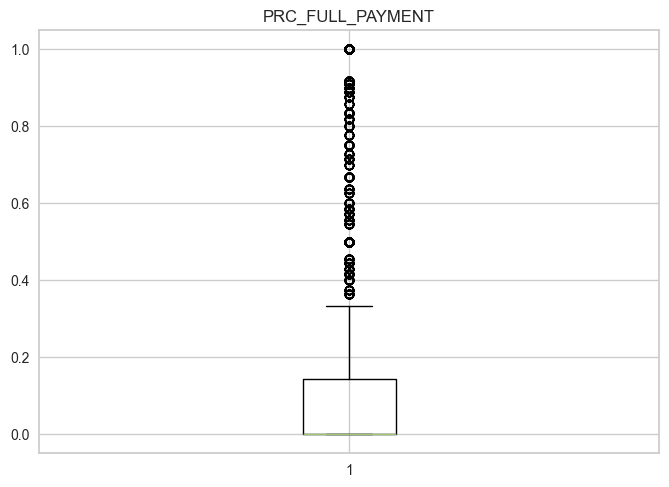

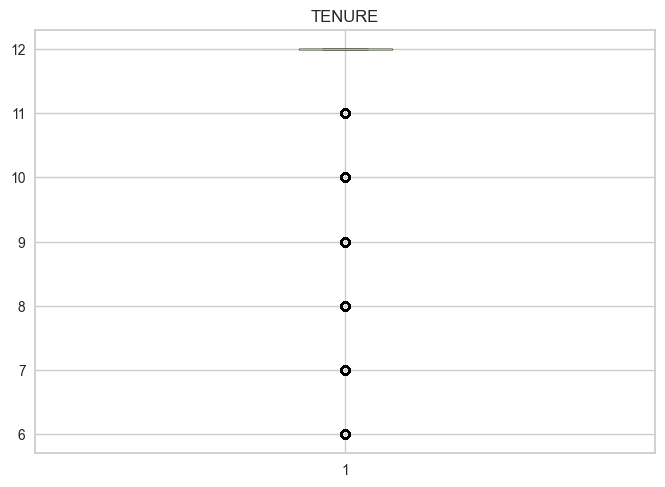

In [13]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        plt.figure()
        plt.boxplot(df[column])
        plt.title(column)
        plt.show()

Show the correlation between columns by plotting the heatmap of correlation coefficients. 

In [17]:
df = df.select_dtypes(include=[np.number])

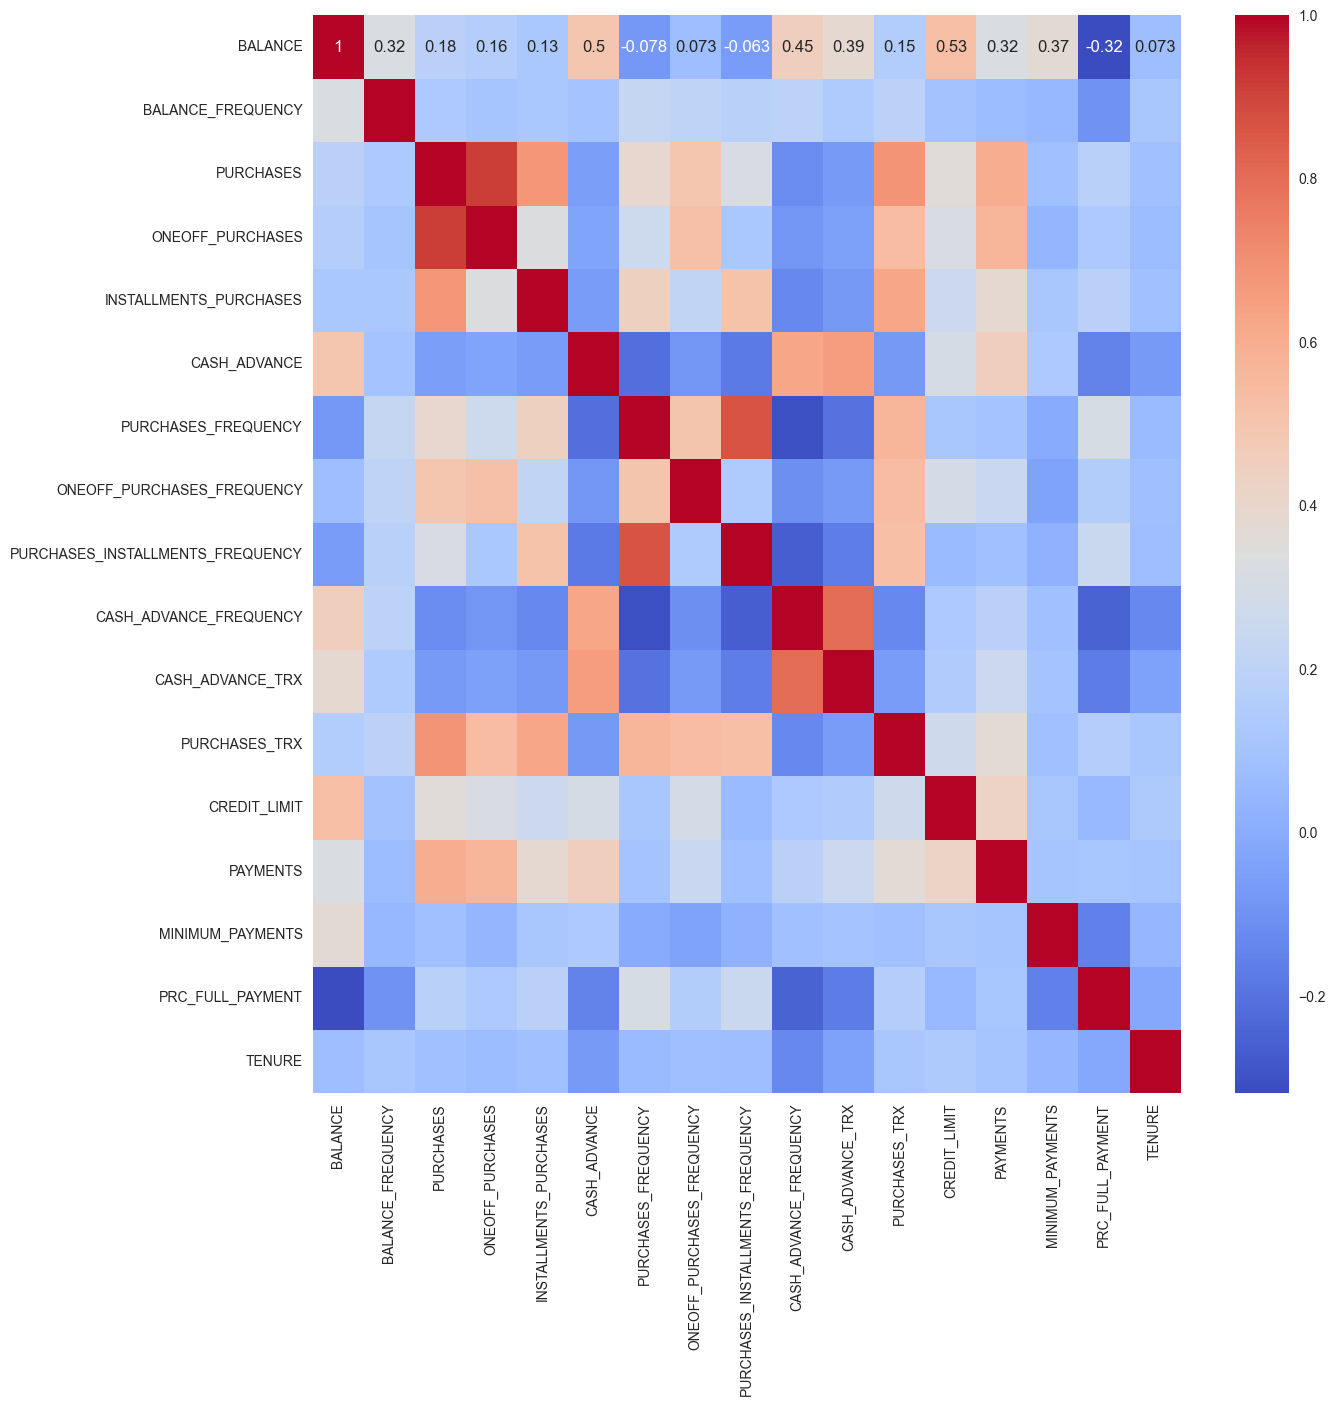

In [18]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Phase 2: Preprocessing

## Sec 1: Preprocess the data 

drop the 'CUST_ID' column. 

In [20]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,3000.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,3000.000000,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Check for duplicated rows. If there is any duplicated row, remove them. 

In [21]:
print(f"number of duplicate rows: {len(df[df.duplicated()])}")
df = df.drop_duplicates()

number of duplicate rows: 0


Normalize the values of each column. 

In [22]:
# my own normalizer
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

In [23]:
ndf = df.copy()

In [24]:
# sklearn normalizer
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
cols = df.columns.tolist()
ndf[cols] = normalizer.fit_transform(df[cols])

In [25]:
ndf.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.001645,0.626554,0.001490,0.000000,0.003247,0.000000,0.127632,0.000000,0.063815,0.000000,0.000000,0.004278,0.024290,0.003047,0.001398,0.000000,0.765789
1,0.118552,0.640870,0.000000,0.000000,0.000000,0.096357,0.000000,0.000000,0.000000,0.117493,0.022925,0.000000,0.163588,0.057026,0.009894,0.156657,0.704957
2,0.064860,0.495014,0.007805,0.009390,0.000000,0.000000,0.495014,0.495014,0.000000,0.000000,0.000000,0.016593,0.123134,0.006071,0.004064,0.000000,0.495014
3,0.071570,0.520389,0.024996,0.030073,0.000000,0.003570,0.068146,0.068146,0.000000,0.045431,0.006648,0.002284,0.203415,0.000000,0.032108,0.000000,0.817754
4,0.030232,0.704050,0.000230,0.000276,0.000000,0.000000,0.058671,0.058671,0.000000,0.000000,0.000000,0.001967,0.027034,0.009416,0.002255,0.000000,0.704050


# Phase 3: Modeling

## Sec 1: PCA and K-means with sklearn 

Use the `PCA` class from the `sklearn` library to reduce the dimensionality of the DataFrame. 

In [26]:
pca = PCA()
pca.fit(ndf)
pca_data = pca.transform(ndf)
pca_data.shape

(8950, 17)

Text(0, 0.5, 'variance learned')

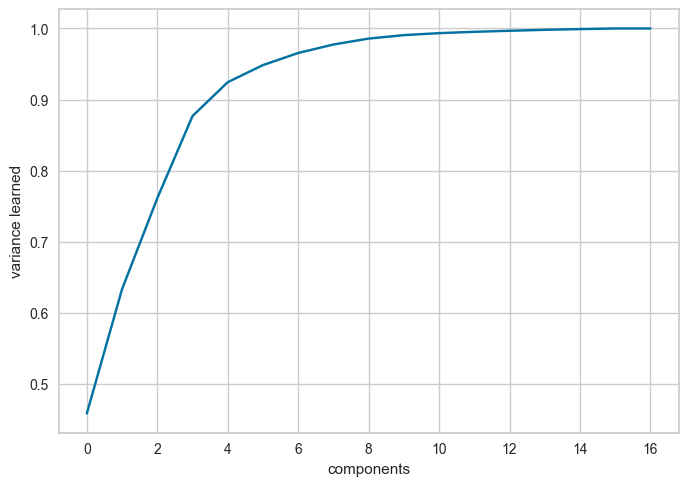

In [27]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('components')
plt.ylabel('variance learned')

In [28]:
# So, I will choose components = 5 as more than 90% percent is learned there, there is also some kind of elbow there
pca = PCA(5)
pca.fit(ndf)
pca_data = pca.transform(ndf)
pca_data.shape

(8950, 5)

**Elbow Method Visualization** helps to determine the optimal number of clusters by visualizing the within-cluster sum of squares (WCSS) against the number of clusters.

Use the `plot_elbow_method function` to plot the number of clusters versus WCSS for both the main DataFrame and the one reduced using `PCA`. Then Discuss the choice of the number of components for PCA and clusters for K-means. 

In [29]:
def plot_elbow_method(X, max_clusters=10):
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1, max_clusters + 1), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

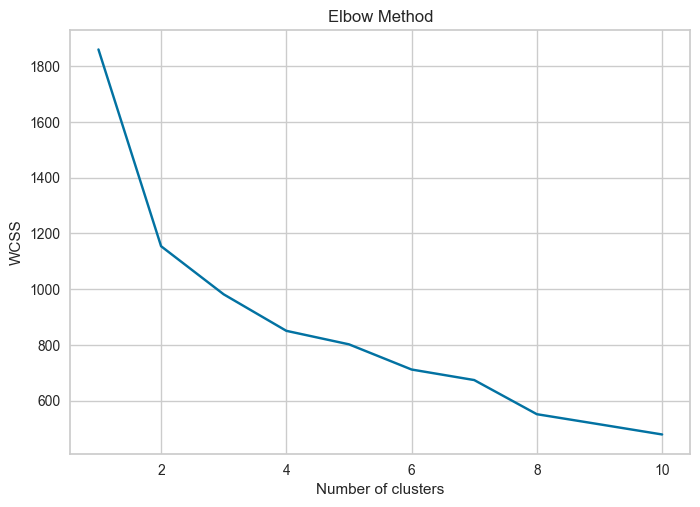

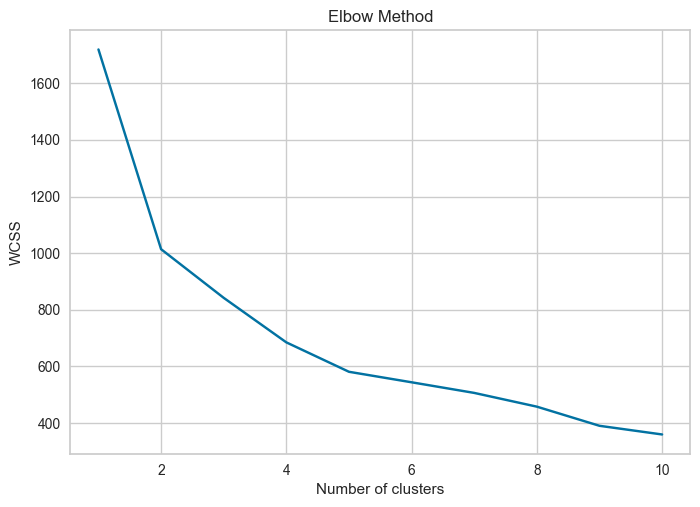

In [30]:
plot_elbow_method(ndf)
plot_elbow_method(pca_data)

Use the `KMeans` class from the `sklearn.cluster` module to create clusters from the DataFrame that has been dimensionally reduced using `PCA`.

In [31]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(pca_data)
y_kmeans = kmeans.predict(pca_data)

Complete the definition of the following class to implement PCA, which is capable of reducing the dimensionality. 

In [32]:
class CustomPCA:
    """
    Custom implementation of PCA.
    Attributes:
    -----------
    n_components : int
        Number of principal components.
    components : ndarray
        Principal components.
    """
    def init(self, n_components):
        self.n_components = n_components
        self.components = None

    def fit(self, X):
        """
        Fit the model with X.
        Parameters:
        -----------
        X : ndarray, shape (n_samples, n_features)
            Training data.
        """
        # Calculate covariance matrix
        cov = np.cov(X.T)
        # Find eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        # Sort eigenvectors based on eigenvalues
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        # Store first n_components eigenvectors in self.components
        self.components = eigenvectors[0:self.n_components]


    def transform(self, X):
        """
        Apply dimensionality reduction to X.
        Parameters:
        -----------
        X : ndarray, shape (n_samples, n_features)
            Data to transform.
        Returns:
        --------
        X_transformed : ndarray, shape (n_samples, n_components)
            Transformed data.
        """
        # Project data
        X_transformed = np.dot(X, self.components.T)
        return X_transformed

Complete defining the class below to implement `KMeans`, an algorithm designed for clustering.

In [33]:
class CustomKMeans:
    """
    Custom implementation of K-means clustering.
    Attributes:
    -----------
    n_clusters : int
        Number of clusters.
    centroids : ndarray
        Coordinates of cluster centers.
    """
    def init(self, n_clusters):
        self.n_clusters = n_clusters
        self.centroids = None


    def fit_predict(self, X):
        """
        Compute k-means clustering.
        Parameters:
        -----------
        X : ndarray, shape (n_samples, n_features)
            Training instances to cluster.
        Returns:
        --------
        labels : ndarray, shape (n_samples,)
            Index of the cluster each sample belongs to.
        """
        # Initialize centroids
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        # Repeat until convergence:
        while True:
            # Assign points to the nearest centroid
            labels = np.argmin(np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2)),axis=0)
            # Recalculate the centroids
            centroids = []
            for i in range(self.n_clusters):
                centroids.append(np.mean(X[labels == i], axis=0))
            new_centroids = np.array(centroids)
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids
        return labels

## Sec 2: Fitting implemented Kmeans 

Use your implemented `CustomPCA` to reduce the dimensionality of the DataFrame. 

In [34]:
custom_pca = CustomPCA()
custom_pca.init(5)
custom_pca.fit(ndf)
custom_pca_data = custom_pca.transform(ndf)

Apply the `CustomKMeans` implementation you created to perform clustering on the DataFrame. 

In [35]:
custom_kmeans = CustomKMeans()
custom_kmeans.init(3)
custom_kmeans_labels = custom_kmeans.fit_predict(custom_pca_data)

# Phase 4: Analyzing

## Sec 1: Visualizing and Comparing 

Visualize and compare the clustering results from the sklearn library with those from your custom clustering implementation. 

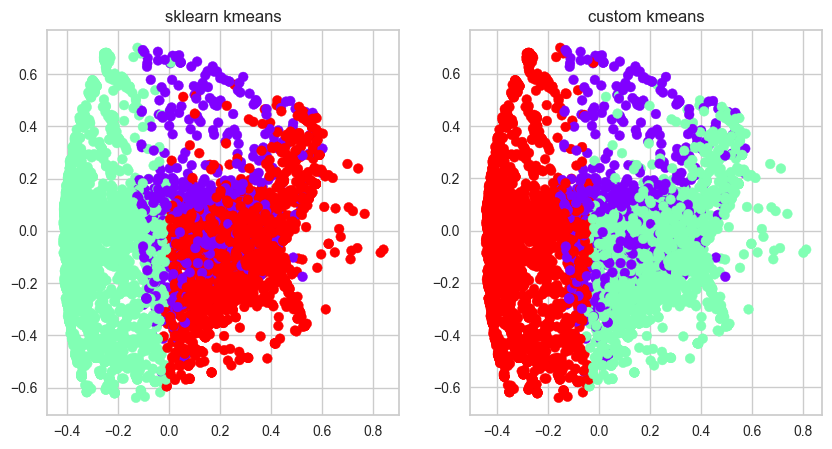

In [36]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(pca_data[:,0], pca_data[:,1], c=y_kmeans, cmap='rainbow')
plt.title('sklearn kmeans')
plt.subplot(1,2,2)
plt.scatter(custom_pca_data[:,0], custom_pca_data[:,1], c=custom_kmeans_labels, cmap='rainbow')
plt.title('custom kmeans')
plt.show()

## Sec 2: Silhouette Analysis 

**Silhouette Analysis** involves calculating and plotting the silhouette coefficients, which measure how similar each point is to its own cluster compared to other clusters. The closer these coefficients are to +1, the better the clustering.

Calculate the silhouette scores for each sample in the dataset using `silhouette_samples` and the average silhouette score using `silhouette_score`. Then, visualize these scores in a plot for each cluster for both results from the sklearn library and those from your custom clustering implementation. 

Sklearn
silhouette_score: 0.36953264005381714
silhouette_samples: [0.50259466 0.56948267 0.46355513 ... 0.22853621 0.11668125 0.30137562]
Mine
silhouette_score: 0.36938698414824256
silhouette_samples: [0.50259078 0.56955211 0.46350268 ... 0.22805148 0.11686276 0.30147329]


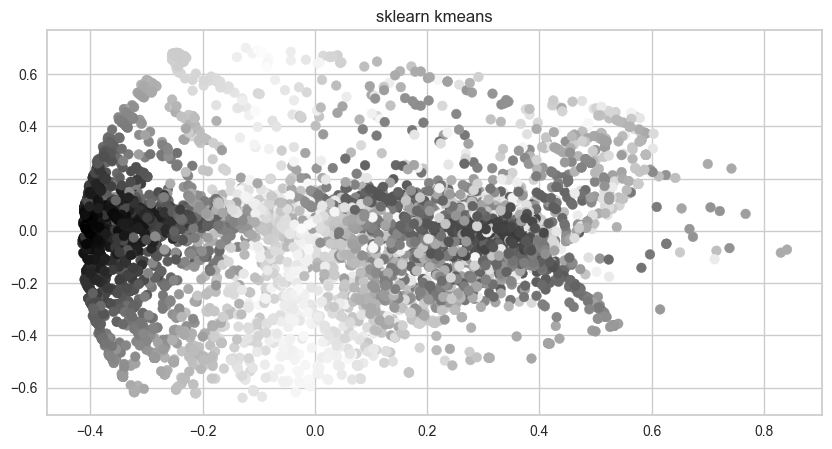

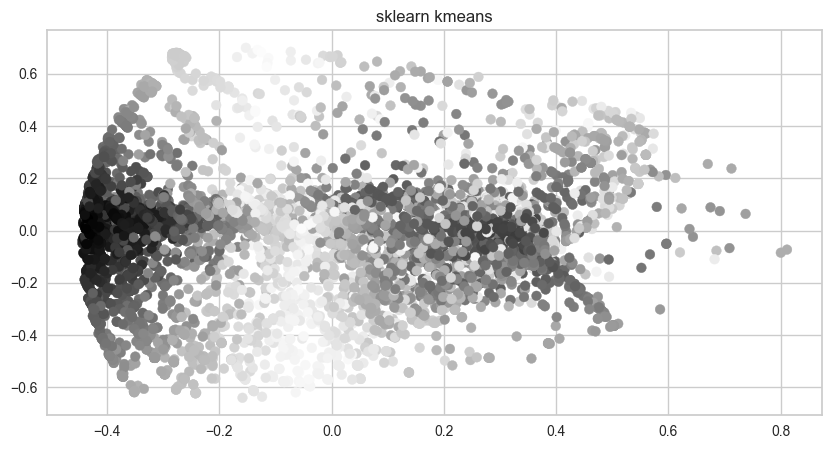

In [37]:
print("Sklearn")
print(f"silhouette_score: {silhouette_score(pca_data, y_kmeans)}")
print(f"silhouette_samples: {silhouette_samples(pca_data, y_kmeans)}")
print("Mine")
print(f"silhouette_score: {silhouette_score(custom_pca_data, custom_kmeans_labels)}")
print(f"silhouette_samples: {silhouette_samples(custom_pca_data, custom_kmeans_labels)}")
plt.figure(figsize=(10,5))
plt.scatter(pca_data[:,0], pca_data[:,1], c=silhouette_samples(pca_data, y_kmeans))
plt.title('sklearn kmeans')
plt.show()
plt.figure(figsize=(10,5))
plt.scatter(custom_pca_data[:,0], custom_pca_data[:,1], c=silhouette_samples(custom_pca_data, custom_kmeans_labels))
plt.title('sklearn kmeans')
plt.show()

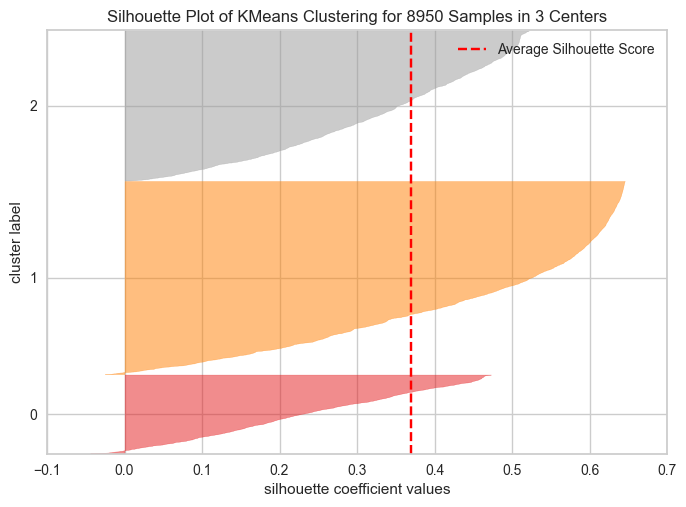

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8950 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [38]:
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(pca_data)
visualizer.show()

Text(0.5, 1.0, 'Custom Kmeans')

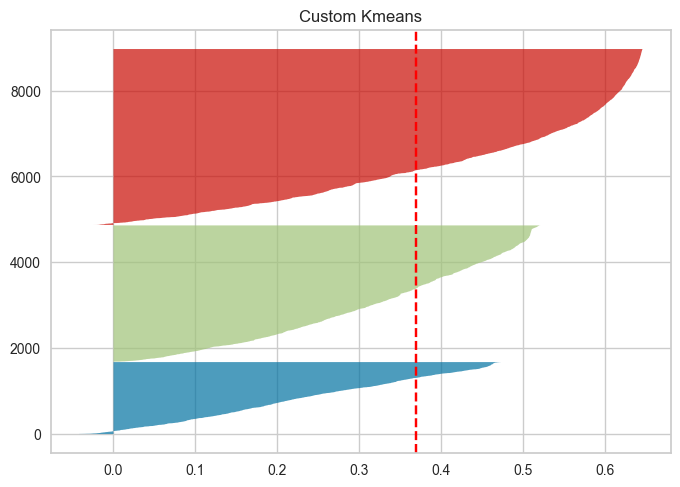

In [39]:
# for kmeans the visualizer does not work as it is a custom class so :
l=0
custom_scores = silhouette_score(custom_pca_data, custom_kmeans_labels)
custom_samples = silhouette_samples(custom_pca_data, custom_kmeans_labels)
for i in range(3):
    cluster_samples = custom_samples[custom_kmeans_labels == i]
    cluster_samples.sort()
    cluster_size = cluster_samples.shape[0]
    u = l + cluster_size
    plt.fill_betweenx(np.arange(l,u), 0, cluster_samples, alpha=0.7)
    l = u + 10

plt.axvline(x=custom_scores, color="red", linestyle="--")
plt.title("Custom Kmeans")

the first plot, a little bit more beautiful :)

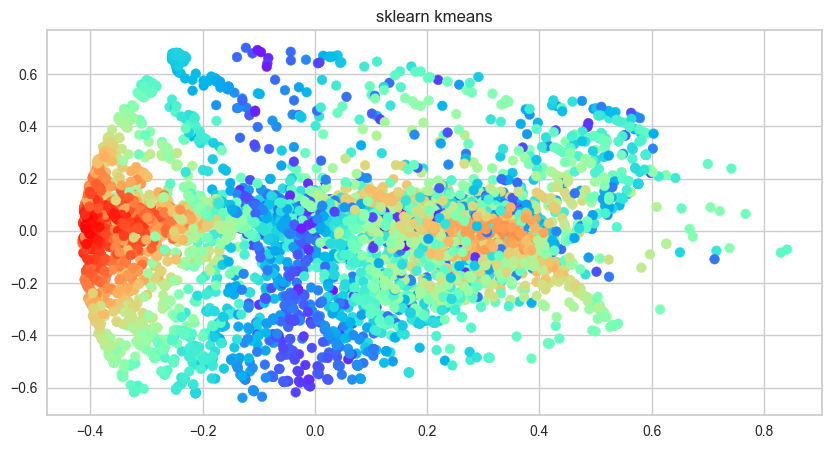

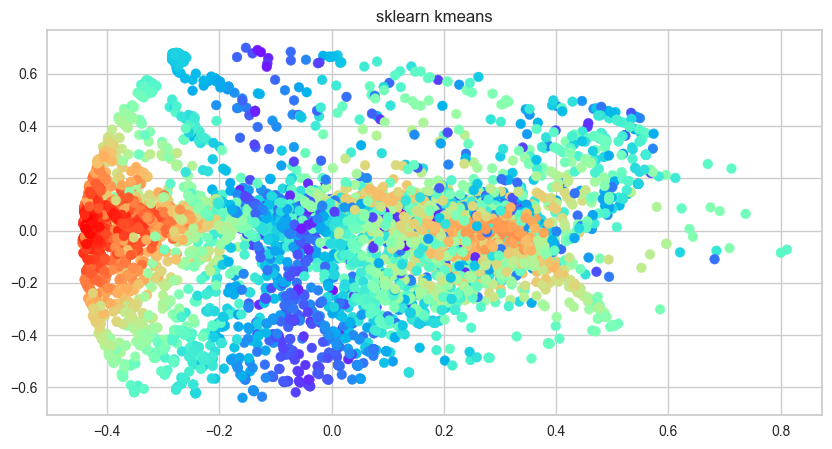

In [40]:
plt.figure(figsize=(10,5))
plt.scatter(pca_data[:,0], pca_data[:,1], c=silhouette_samples(pca_data, y_kmeans),cmap='rainbow')
plt.title('sklearn kmeans')
plt.show()
plt.figure(figsize=(10,5))
plt.scatter(custom_pca_data[:,0], custom_pca_data[:,1], c=silhouette_samples(custom_pca_data, custom_kmeans_labels),cmap='rainbow')
plt.title('sklearn kmeans')
plt.show()

# Extra
Something I noticed, Using standard Scaler instead of Normalizer leads us towards using one more cluster

In [41]:
sc = StandardScaler()
ndf = pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [42]:
pca = PCA()
pca.fit(ndf)
pca_data = pca.transform(ndf)
pca_data.shape

(8950, 17)

Text(0, 0.5, 'variance learned')

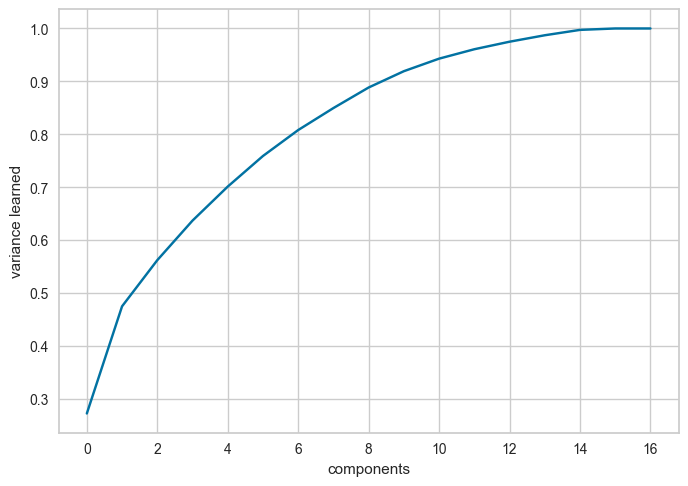

In [43]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('components')
plt.ylabel('variance learned')

In [44]:
custom_pca = CustomPCA()
custom_pca.init(10)
custom_pca.fit(ndf)
custom_pca_data = custom_pca.transform(ndf)

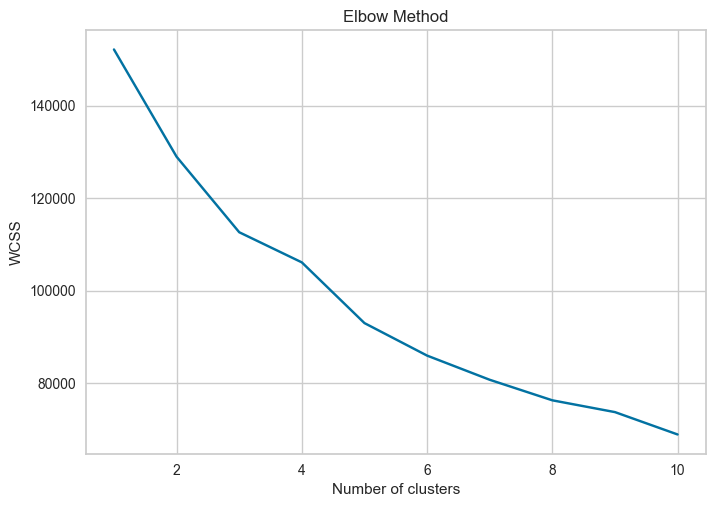

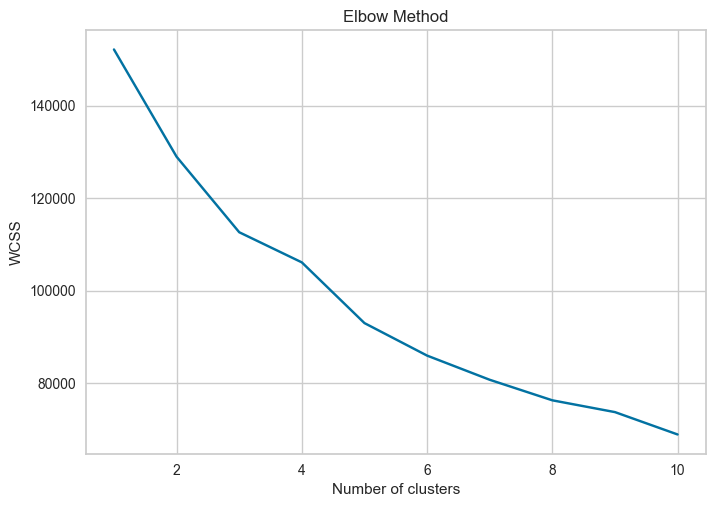

In [45]:
plot_elbow_method(ndf)
plot_elbow_method(pca_data)

In [46]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(pca_data)
y_kmeans = kmeans.predict(pca_data)

In [47]:
custom_kmeans = CustomKMeans()
custom_kmeans.init(4)
custom_kmeans_labels = custom_kmeans.fit_predict(custom_pca_data)

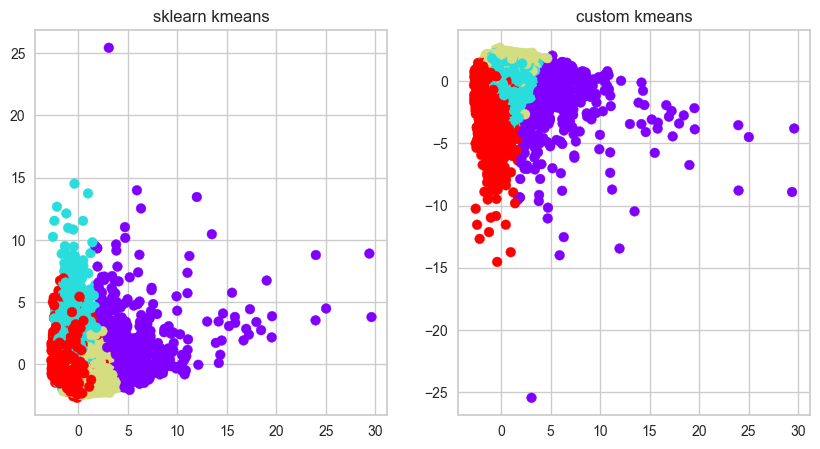

In [48]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(pca_data[:,0], pca_data[:,1], c=y_kmeans, cmap='rainbow')
plt.title('sklearn kmeans')
plt.subplot(1,2,2)
plt.scatter(custom_pca_data[:,0], custom_pca_data[:,1], c=custom_kmeans_labels, cmap='rainbow')
plt.title('custom kmeans')
plt.show()